In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
  

In [2]:
DATASET_FILENAME = 'june24_publish.csv'

In [3]:

CONST_OPERATOR = 'JIO'
CONST_STATE = 'Delhi'
CONST_TECHNOLOGY = '4G'



In [4]:
final_download_speeds = [] 
final_upload_speeds = [] 
final_states = [] 
final_operators = [] 
df = pd.read_csv('june24_publish.csv') 

df.columns = ['Service Provider', 'Technology', 'Test Type', 
                   'Data Speed', 'Signal Strength', 'State'] 
states = df['State'].unique() 
print('STATES Found: ', states) 
  
 
operators = df['Service Provider'].unique() 
print('OPERATORS Found: ', operators) 

STATES Found:  ['Haryana' 'Kolkata' 'UP East' 'Delhi' 'Orissa' 'Maharashtra' 'Bihar'
 'Kerala' 'Punjab' 'West Bengal' 'Madhya Pradesh' 'Rajasthan' 'Gujarat'
 'Tamil Nadu' 'Andhra Pradesh' 'UP West' 'Himachal Pradesh'
 'Jammu & Kashmir' 'Mumbai' 'Chennai' 'North East' 'Karnataka' 'Assam']
OPERATORS Found:  ['AIRTEL' 'JIO' 'Vi India' 'CELLONE']


In [13]:
filtered = df[(df['Service Provider'] == CONST_OPERATOR)  
               & (df['Technology'] == CONST_TECHNOLOGY)] 
for state in states: 
    
         base = filtered[filtered['State'] == state] 
         down = base[base['Test Type'] == 'download'] 
         up = base[base['Test Type'] == 'upload'] 
         avg_down = down['Data Speed'].mean() 
         avg_up = up['Data Speed'].mean() 
         if (pd.isnull(avg_down) or pd.isnull(avg_up)): 
           down, up = 0, 0
         else: 
             final_states.append(state) 
             final_download_speeds.append(avg_down) 
             final_upload_speeds.append(avg_up) 
             print(str(state) + ' -- Avg. Download: ' +
         str('%.2f' % avg_down) + 
         '  Avg. Upload: ' + str('%.2f' % avg_up))  

Haryana -- Avg. Download: 16620.15  Avg. Upload: 5728.59
Kolkata -- Avg. Download: 55451.39  Avg. Upload: 7341.48
UP East -- Avg. Download: 45042.97  Avg. Upload: 8072.79
Delhi -- Avg. Download: 52439.26  Avg. Upload: 6713.95
Orissa -- Avg. Download: 58868.59  Avg. Upload: 7392.15
Maharashtra -- Avg. Download: 34683.17  Avg. Upload: 6068.93
Bihar -- Avg. Download: 36350.67  Avg. Upload: 5865.69
Kerala -- Avg. Download: 28000.24  Avg. Upload: 4310.84
Punjab -- Avg. Download: 52101.02  Avg. Upload: 6328.33
West Bengal -- Avg. Download: 18235.46  Avg. Upload: 5789.88
Madhya Pradesh -- Avg. Download: 51332.45  Avg. Upload: 6325.13
Rajasthan -- Avg. Download: 38483.57  Avg. Upload: 7839.99
Gujarat -- Avg. Download: 23515.48  Avg. Upload: 8826.95
Tamil Nadu -- Avg. Download: 44800.20  Avg. Upload: 6587.43
Andhra Pradesh -- Avg. Download: 40344.53  Avg. Upload: 5654.06
UP West -- Avg. Download: 38342.89  Avg. Upload: 5205.52
Himachal Pradesh -- Avg. Download: 17351.39  Avg. Upload: 5814.19
Ja

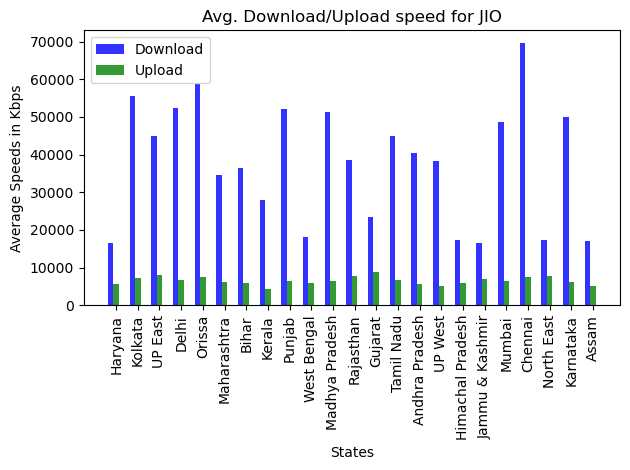

In [14]:
fig, ax = plt.subplots() 
bar_width = 0.25
opacity = 0.8
index = np.arange(len(final_states)) 
bar_download = plt.bar(index, final_download_speeds, 
                       bar_width, alpha=opacity, 
                       color='b', label='Download') 
bar_upload = plt.bar(index + bar_width, final_upload_speeds,  
                        bar_width, alpha=opacity, color='g', 
                                             label='Upload') 
plt.title('Avg. Download/Upload speed for '
                     + str(CONST_OPERATOR)) 
plt.xlabel('States') 
plt.ylabel('Average Speeds in Kbps') 
plt.xticks(index + bar_width, final_states, rotation=90) 
plt.legend() 
plt.tight_layout() 
plt.show() 